# Teorema Fundamental do Cálculo com SymPy

[Um Sistema Algébrico Computacional](https://pt.wikipedia.org/wiki/Sistema_alg%C3%A9brico_computacional) é um programa que permite a computação de expressões matemáticas. Em contraste à uma simples calculadora, o [SAC](https://pt.wikipedia.org/wiki/Sistema_alg%C3%A9brico_computacional) resolve os problemas não de forma numérica, mas usando expressões simbólicas, como variáveis, funções, polinômios e matrizes.

Todo [SAC](https://pt.wikipedia.org/wiki/Sistema_alg%C3%A9brico_computacional) tem essencialmente a mesma funcionalidade. Isso significa que se você entender como um deles funciona, você será capaz de usar todos os outros também. Sistemas comerciais conhecidos incluem Maple, MATLAB e Mathematica, existem também os gratuitos e livres, podemos citar, Octave, Magma e [SymPy](https://www.sympy.org/en/index.html) (no qual abordaremos).

Em um [SAC](https://pt.wikipedia.org/wiki/Sistema_alg%C3%A9brico_computacional) simbólico, números e operações são expressados simbolicamente, sendo assim as respostas obtidas são exatas. Por exemplo o número √2 é representado em SymPy como o objeto Pow(2, 1/2). Em um Sistema Algébrico Numérico como Octave o número √2 é representado como a aproximação 1.41421356237310 (ponto flutuante). Para muitos casos está certo, mas essas aproximações podem nos trazer problemas: float(sqrt(2)) * float(sqrt(2)) = 2.00000000000000004 ≠ 2. Porque SymPy usa a representação exata, tais problemas não aparecerão! Pow(2,1/2) * Pow(2,1/2) = 2

## Nós podemos utilizar SymPy diretamente do interpretador Python

In [1]:
from sympy import *
init_printing()

Dessa forma importamos todos os métodos e variáveis de SymPy. Agora vamos começar aprendendo sobre os objetos e operações básicas de SymPy. Por exemplos, nós vamos aprender o que significa resolver uma equação, expandir uma expressão e fatorar polinômios.

A respeito do número 1/7

In [5]:
1.0/7

0.14285714285714285

A representação do ponto flutuante á apenas válida para no máximo 16 decimais, pois 1/7 é infinitamente longo.
Para obter uma representação exata nós podemos simplificar a expressão usando a função **S()**.

In [10]:
S("1/7")

Assim como na vida real, quando trabalhamos em matemática ou física, é melhor que possamos trabalhar simbolicamente até o fim, antes de computarmos uma resposta numérica, para assim evitarmos erros de arredondamento. Em SymPy é interessante usarmos os objetos SymPy assim que possível e então obter uma aproximação numérica do objeto SymPy final, como um ponto flutuante, para isso utilizamos o método **.evalf()**:

In [11]:
pi

In [12]:
pi.evalf()

Também podemos utilizar o método global do SymPy **N()** para obtermos valores numéricos. Ao fornecermos um valor inteiro como argumento, nós podemos facilmente alterar o número de dígitos de precisão que as aproximações devem retornar

In [13]:
pi.n(300)

Para definirmos um símbolo em SymPy é necessário utilizarmos o método **Symbol()**, assim poderemos trabalhar com ele em expressões

In [14]:
x = Symbol("x")
x + 2

O nome x é definido como um símbolo, sendo assim SymPy sabe que x + 2 é uma expressão. Também podemos usar uma lista de símbolos com a seguinte notação:

In [15]:
x0, x1, x2, x3 = symbols('x0:4')

Nós podemos basicamente nomear nossas variáveis da maneira que desejarmos, mas é interessante evitarmos sobrescrever nomes construídos em Sympy, como por exemplo Q, C, O, S, I e E. I é a unidade imaginária de um número, E é a base do logaritmo natural...

O underscore _ é uma variável especial que contém o resultado do último valor impresso. É análogo ao botão ans em muitas calculadoras, em outros Sistemas Algébricos Computacionais é normalmente utilizado o %.

In [16]:
3+3

In [17]:
_*10

Podemos definir uma expressão com a combinação de símbolos com operações matemáticas básicas e outras funções:

In [18]:
expressao = 2*x + 3*x - sin(x) - 3*x + 42

In [6]:
simplify(expressao)

A função **simplify** pode ser utilizada em qualquer expressão para simplificá-la

Outra operação matemática muito comum em expressões é mostrada no seguinte exemplo

O método **factor()** computa a fatoração de uma dada expressão:

In [19]:
factor(x**2-2*x-8)

O método **expand()** é a operação "inversa" do fatorial e executa a expansão de uma expressão.

In [8]:
expand((x-4)*(x+2))

Com o método **collect()** nós podemos coletar os termos para diferentes potências de uma dada variável (neste exemplo utilizamos x) para uma expressão.

In [9]:
a, b = symbols("a b")
collect(x**2 + x*b + a*x + a*b, x)

Para substituirmos um dado valor em uma expressão, nós chamamos o método **subs()**, passando a ele um dicionário ({chave:valor}).

In [20]:
y = Symbol("y")
expr = sin(x) + cos(y)
print(expr)

sin(x) + cos(y)


In [21]:
expr.subs({x:1, y:2})

In [22]:
expr.subs({x:1, y:2}).n()

A função **solve** talvez seja a ferramenta mais poderosa do SymPy, ela pode resolver praticamente qualquer equação.
A função recebe dois argumentos: **solve**(expr, var). 

Por exemplo, vamos resolver a equação quadrática:

$x² + 2x - 8 = 0$

In [23]:
solve(x**2+2*x-8,x)

O resultado é uma lista de soluções para $x$ que satisfaz a equação acima.
A melhor parte do **solve()** é que ele também funciona com expressões simbólicas.

Por exemplo, vamos buscar a solução de 

$ax² + bx + c = 0$

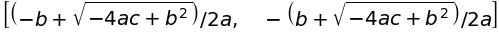

In [24]:
a, b, c = symbols('a b c')
solve(a*x**2+b*x+c, x)

Utilizamos os símbolos a, b e c para resolver a equação. Você deve reconhecer a solução da fórmula quadrática:

\begin{array}{*{20}c} {x = \frac{{ - b \pm \sqrt {b^2 - 4ac} }}{{2a}}} & {{\rm{quando}}} & {ax^2 + bx + c = 0} \\ \end{array}

Para resolvermos um sistema de equações, nós podemos alimentar a função **solve** com uma lista de equações e uma lista de termos desconhecidos que ele deve resolver a equação. Vamos tentar resolver para $x$ e $y$ o sistema de equações 

$x + y = 3 e 3x -2y = 0$

In [25]:
solve([x+y-3, 3*x-2*y],[x,y])

Por padrão, SymPy não combinará ou separará expressões racionais. É necessário utilizarmos o método **together** para calcular simbolicamente a adição de frações.

In [26]:
a, b, c, d = symbols("a b c d")
a/b + c/d

In [27]:
together(a/b+c/d)

Se você tiver uma expressão racional e desejar dividir o numerador pelo denominador, use o método **apart**

In [28]:
apart((x**2+x+4)/(x+2))

Vamos definir um polinômio $P$ com raízes em $x = 1$, $x = 2$ e $x = 3$

In [34]:
P = (x-1)*(x-2)*(x-3)
P

Para vermos a versão expandida do polinômio, chamaremos o método **expand**

In [31]:
P.expand()

Se nós começarmos com a forma expandida $P(x) = x³ - 6x² + 11x - 6$ nós podemos obter as raízes utilizando os métodos **factor** ou **simplify**

In [32]:
P.factor()

In [33]:
P.simplify()

Lembre que as raízes do polinômio $P(x)$ são definidas como soluções para a equação $P(x) = 0$.
Nós podemos usar a função **solve** para encontrarmos as raízes do polinômio

In [35]:
roots = solve(P,x)
roots

Vamos checar se $P$ é igual $(x-1)(x-2)(x-3)$

In [36]:
simplify(P - (x-roots[0])*(x-roots[1])*(x-roots[2]))

As funções trigonométricas como seno e coseno recebem inputs em radianos. 
Para chamarmos elas usando argumentos em graus é necessário o fator de conversão 
$\frac{{\pi}}{{180}}$ ou utilizar **numpy.radians** ou **numpy.deg2rad** da biblioteca NumPy

SymPy está ciente de diversas identidades trigonométricas

In [37]:
sin(x) == cos(x-pi/2)

True

In [115]:
simplify(sin(x)*cos(y) + cos(x)*sin(y))

sin(x + y)

In [38]:
e = 2*sin(x)**2 + 2*cos(x)**2

In [55]:
trigsimp(e)

2

In [39]:
simplify(sin(x)**4 -2* cos(x)**2* sin (x)**2+ cos (x)**4)

In [40]:
expand_trig(sin (2* x ))

Cálculo é o estudo das propriedades das funções. Aqui nós iremos aprender os métodos de SymPy para calcularmos limites, derivadas, integrais e somatórios.

### Infinito

O símbolo para o infinito em SymPy é denotado como dois o's em lowercase. SymPy sabe como tratar o infinito corretamente em expressões

In [41]:
oo

In [42]:
oo+1

In [43]:
5000 < oo

In [44]:
1/oo

In [45]:
oo > 9999999999999999

Com limites nós podemos descrever, com precisão matemática, infinitas grandes quantidades, infinitas pequenas quantidades e procedimentos com infinitos passos. Por exemplo, o número **e** é definido como o limite:

\begin{equation} e \equiv \lim_{n\to\infty}\left(1 + \frac{{1}}{{n}}\right)^n\end{equation}

In [46]:
n = Symbol('n')
limit((1+1/n)**n, n, oo)

In [47]:
E.evalf()

Limites também são úteis para descrever comportamento asimtótico da função.

Considere a função:

\begin{equation}f(x)=\frac1x\end{equation}

In [48]:
limit(1/x, x, 0, dir='+')

In [49]:
limit(1/x, x, 0, dir='-')

In [50]:
limit(1/x, x, oo)

A função derivada, denotada normalmente por: \begin{equation}f'(x) , \frac{{d}}{{dx}}f(x) , \frac{{df}}{{dx}} , \frac{{dy}}{{dx}} \end{equation}

A derivada descreve a taxa de variação de uma função $f(x)$.

O método **diff** do SymPy computa a derivada de uma dada expressão.

In [51]:
diff(x**3, x)

O método **diff** está ciente da **Regra do produto:**


\begin{equation}[f(x)g(x)]' = f'(x)g(x) + f(x)g'(x)\end{equation}

In [52]:
diff(x**2*sin(x), x)

**Regra da cadeia:**

\begin{equation}f(g(x))' = f'(g(x))g'(x)\end{equation}

In [53]:
diff(sin(x**2), x)

e, por fim, a **Regra do quociente:**

\begin{equation}\left(\frac{{f(x)}}{{g(x)}}\right)' = \frac{{f'(x)g(x) - f(x)g'(x)}}{{g(x)²}}\end{equation}

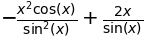

In [54]:
diff(x**2/sin(x), x)

Uma equação diferencial é uma equação que relaciona alguma função desconhecida $f(x)$ com sua derivada. Como exemplo vamos considerar $f'(x) = f(x)$ ou a expressão equivalente $f(x) - f'(x) = 0$

Para resolvermos esse problema aplicaremos o método **dsolve**

In [55]:
z = symbols('z')
f = symbols('f', cls=Function)
dsolve(f(x) - diff(f(x),x), f(x))

A integral de uma função $f(x)$ corresponde à computação da área abaixo do gráfico de $f(x)$. 

A área abaixo de $f(x)$ entre os pontos $x = a$ e $x = b$ é denotada como:

\begin{equation}A(a,b) = \int_{a}^{b} f(x)dx\end{equation}

A função integral $F$ corresponde ao cálculo da área como função do limite superior da integração:

\begin{equation}F(c) = \int_{0}^{c} f(x)dx\end{equation}

A área debaixo $f(x)$ entre $x = a$ e $x = b$ é dada:

\begin{equation}A(a,b) = \int_{a}^{b} f(x)dx = F(b) - F(a)\end{equation}

Em SymPy nós usamos **integrate(f, x)** para obter a função integral $F(x)$ de qualquer dada função $f(x)$

In [56]:
integrate(x**3, x)

In [57]:
integrate(sin(x), x)

In [58]:
integrate(ln(x), x)

Isso é conhecido como integral indefinida, uma vez que não foi especificado o limite da integração

Em contraste, uma integral definida computa a área debaixo de $f(x)$ entre $x = a$ e $x = b\$

In [59]:
integrate(x**3, (x, 0, 1))

Nós podemos obter a mesma área primeiro calculando a integral indefinida

\begin{equation}F(c) = \int_{0}^{c} f(x)dx\end{equation}

e então usar

\begin{equation}A(a,b) = \int_{a}^{b} f(x)dx = F(b) - F(a)\end{equation}

In [60]:
F = integrate(x**3, x)
F.subs({x: 1}) - F.subs({x: 0})

A integral é a operação inversa da derivada. Se você executar a operação integral seguidamente da operação derivada em uma função, você obterá a mesma função:

\begin{equation}\left(\frac{{d}}{{dx}} \circ \int_ .dx \right)f(x) \equiv \frac{{d}}{{dx}} \int_{c}^{x} f(u)du \equiv f(x)\end{equation}

In [61]:
f = x**2
F = integrate(f,x)
F

In [62]:
diff(F,x)

Alternativamente, se computarmos a derivada de uma função seguida de sua integral nós iremos obter a função original $f(x)$ e mais uma constante:

\begin{equation}\left(  \int_ .dx \circ \frac{{d}}{{dx}} \right)f(x) \equiv \int_{c}^{x} f'(u)du = f(x) + C\end{equation}

In [63]:
f = x**2
df = diff(f, x)
df

In [64]:
integrate(df, x)

O Teorema Fundamental do Cálculo é importante porque ele nos diz como resolver equações diferenciais. Se nós tivermos que resolver para $f(x)$ a equação diferencial

\begin{equation}\frac{{d}}{{dx}}f(x) = g(x)\end{equation}

Nós podemos obter a integral em ambos os lados da equação para obtermos a resposta

\begin{equation}f(x) = \int_ . g(x)dx + C\end{equation}

Sequências são funções que recebem inteiros (números inteiros) como input ao invés de inputs contínuos (números reais). Uma sequência é denotada como $a_n$ para diferenciar da notação da função $a(n)$.

Nós definimos uma sequência especificando uma expressão para seu $n$ termo:

In [65]:
a_n = 1/n
b_n = 1/factorial(n)

Usando as **compreensões de listas em Python**, nós podemos gerar a sequência para alguns gamas de índices:

In [66]:
[ a_n.subs ({ n : i }) for i in range (0 , 8)]

In [67]:
[ b_n.subs ({ n : i }) for i in range (0 , 8)]

Ambos $a_n = \frac{{1}}{{n}}$ e $b_n = \frac{{1}}{{n!}}$

Convergem para 0 como: $n \rightarrow \infty$

In [68]:
limit(a_n, n, oo)

In [69]:
limit(b_n, n, oo)

Vamos supor que nos é dado uma sequência $a_n$ e nós desejamos computar a soma de todos os valores na sequência

\begin{equation}\sum_{n}^{\infty} = a_n\end{equation}

Séries são somas de sequências. Somando os valores da sequência $a_n : \mathbb{N} \rightarrow \mathbb{R}$ é análogo a obter a integral de uma função $f : \mathbb{R} \rightarrow \mathbb{R}$

O método análogo para integrar para séries é chamado **soma**:

In [70]:
a_n = 1/n

In [71]:
b_n = 1/factorial(n)

In [72]:
summation(a_n, [n, 1, oo])

In [73]:
summation(b_n, [n, 0, oo])

O coeficiente na séries de potência de uma função depende no valor de derivadas de ordem maior da função. A equação para o termo n na série de Taylor de $f(x)$ expandida em $x = c$ é: 

\begin{equation}a_n(x) = \frac{{f^n(c)}}{{n!}}(x - c)^n\end{equation}

Onde $f^n(x)$ é o valor da derivada $n$ de $f(x)$ avaliada em $x = c$.
Uma expansão de série de Taylor em $x = 0$ é chamada de série de Maclaurin
Não apenas nós podemos usar séries para aproximarmos números, nós podemos utilizar elas para aproximar funções!
Uma série de potência é uma série no qual os termos contém diferentes potências da variável $x$. Por exemplo, a série de potência da função 

\begin{equation}exp(x) = e^x\end{equation}

\begin{equation}exp(x) \equiv 1 + x + \frac{{x^2}}{{2}} + \frac{{x^3}}{{3!}} + \frac{{x^4}}{{4!}} + \frac{{x^5}}{{5!}} + ... = \sum_{n=0}^{\infty} \frac{{x^n}}{{n!}} \end{equation}

In [74]:
exp_xn = x**n/factorial(n)

In [75]:
summation = exp_xn.subs({x: 5} , [n , 0 , oo ]).evalf()

Em SymPy as séries de função nos possibilitam uma forma fácil de obter séries de qualquer função. Chamando series(expr, var, ar, nmax) irá calcular a expansão da série da expressão próxima a var=at à potência de nmax.

In [76]:
series(sin(x), x, 0, 8)

In [77]:
series(cos(x), x, 0, 8)

In [78]:
series(sinh(x), x, 0, 8)

In [79]:
series(cosh(x), x, 0, 8)

Se uma função não estiver definida em $x = 0$, nós podemos expandir ela em um diferente valor de $x$. Por exemplo, a série de potência de $ln(x)$ expandida em $x = 1$ é:

In [80]:
series(ln(x), x, 1, 6)

Para eliminarmos os termos $(x - 1)$ e obtermos um resultado familiar para a série de Taylor nós podemos utilizar a seguinte técnica. Em vez de expandir $ln(x)$ em $x = 1$, nós obteremos uma expressão mais legível expandindo $ln(x + 1)$ em $x = 0$.

In [81]:
series(ln(x+1), x, 0, 6)